The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# import the database and store it as a DataFrame object
nobel = pd.read_csv('data/nobel.csv')
nobel

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1030,Individual,Louis Brus,1943-00-00,"Cleveland, OH",United States of America,Male,Columbia University,"New York, NY",United States of America,NaN,NaN,NaN
996,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1031,Individual,Aleksey Yekimov,1945-00-00,NaN,USSR (now Russia),Male,Nanocrystals Technology Inc.,"New York, NY",United States of America,NaN,NaN,NaN
997,2023,Literature,The Nobel Prize in Literature 2023,"""for his innovative plays and prose which give...",1/1,1032,Individual,Jon Fosse,1959-09-29,Haugesund,Norway,Male,NaN,NaN,NaN,NaN,NaN,NaN
998,2023,Peace,The Nobel Peace Prize 2023,"""for her fight against the oppression of women...",1/1,1033,Individual,Narges Mohammadi,1972-04-21,Zanjan,Iran,Female,NaN,NaN,NaN,NaN,NaN,NaN


# Most commonly awarded gender and birth country
We can determine the dominating element in this database by using value_counts(), or even use count plots to visualize.

In [2]:
# Most simply, we can use value_counts and index the top values using index[0]
top_gender = nobel["sex"].value_counts().index[0]
top_country = nobel["birth_country"].value_counts().index[0]

# Find out the decade in which there were the most proportion of winners born in the USA 
## keywords
- astype()
- np.floor()
- creating a Boolean column in Dataframe to isolate 
- .values[] to retrieve value specifically, rather than taking an index and value from a Panda Series

In [3]:
# Create a new column to define if the winner is from the US
nobel["us_born"] = nobel["birth_country"] == "United States of America"

# Create a decade column to categorize the Nobel laureates by decades
decade = np.floor(nobel["year"] / 10) # divide by 10, set to corresponding decades by floor
nobel["decade"] = decade * 10
nobel["decade"].astype('int') # set to integer for simplicity, feel free to check on terminal

# Now, we will groupby them by decade
prop_us_winners = nobel.groupby(by="decade", as_index=False)['us_born'].mean()
                                                            # using mean() on a boolean column will
                                                            # calculate the proportion to True
# Identify the decade that had the highest proportion of US-born winners
max_decade_usa = prop_us_winners[prop_us_winners["us_born"] == prop_us_winners["us_born"].max()]['decade'].values[0]
prop_us_winners

,decade,us_born
0,1900.0,0.017544
1,1910.0,0.075000
2,1920.0,0.074074
3,1930.0,0.250000
4,1940.0,0.302326
5,1950.0,0.291667
6,1960.0,0.265823
7,1970.0,0.317308
8,1980.0,0.319588
9,1990.0,0.403846


> **PROGRAMMING NOTE**: Data Manipulation

To find a proportion of a certain value by other categories like we encounter in this notebook (find the proportion of US-born winners by decade), we can do this way:

1. create a column to set the value to True [us-born] it meets the main element requirement (_born in the US_)
2. aggregate values subgrouped by other variables (_decade_) and use **.mean()** on the newly defined column above
    - e.g.: `a = df.groupby(by='decade', as_index=False)["us_born"].mean()`
3. find the most proportion by:
    - max_prop = `a[a["us_born"] == a["us_born"].max()]`

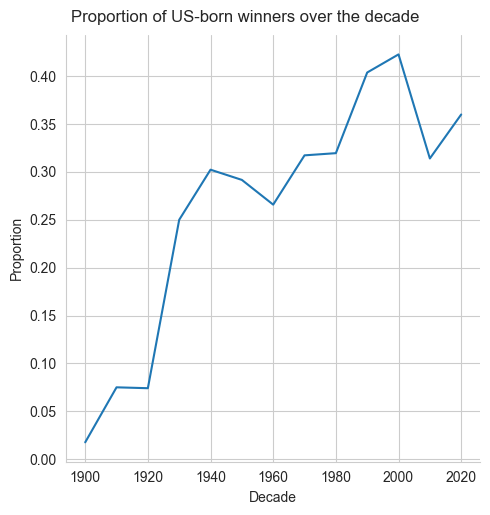

In [4]:
sns.set_style('whitegrid')
ax1 = sns.relplot(x='decade', y='us_born', data=prop_us_winners, kind="line")
ax1.fig.suptitle('Proportion of US-born winners over the decade', y=1.02)
ax1.set(xlabel="Decade", ylabel="Proportion")

In [5]:
# Same as we did for US-born Nobel winners, we can create an additional column for female winner
nobel['is_female'] = nobel["sex"] == 'Female'
female_by_cat_and_decade = nobel.groupby(by=["category", "decade"], as_index=False)["is_female"].mean()

max_female = female_by_cat_and_decade[female_by_cat_and_decade["is_female"]==female_by_cat_and_decade["is_female"].max()][['decade','category']]

# Display the max value
max_female_dict = {max_female['decade'].values[0]:max_female['category'].values[0]}
max_female_dict

{2020.0: 'Literature'}

Text(0.5, 1.02, 'Proportion of women in their respective Nobel disciplines over the year')

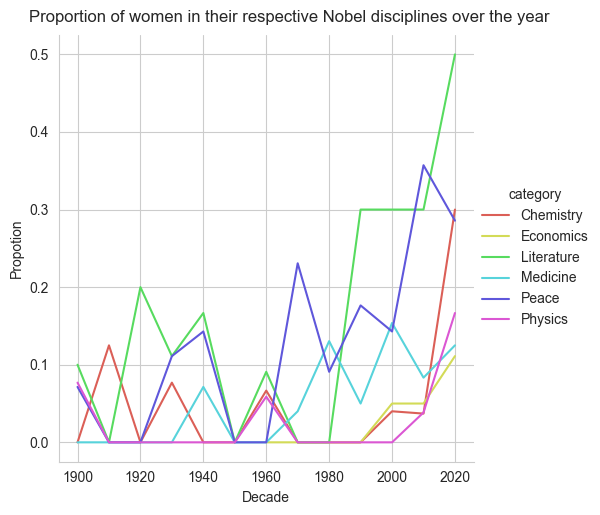

In [14]:
# Let's do a line plot for this 
sns.set_palette('hls')
ax2 = sns.relplot(x='decade', y='is_female', hue='category', data=female_by_cat_and_decade, kind="line")
ax2.set(ylabel="Propotion", xlabel="Decade")
ax2.fig.suptitle('Proportion of women in their respective Nobel disciplines over the year', y=1.02)

In [7]:
# Let's find the first woman to receive a Nobel Prize, and the category which she was placed on
nobel_women = nobel[nobel['sex'] == 'Female']
min_row = nobel_women[nobel_women['year'] == nobel_women['year'].min()]

# Acquire the values from that row
first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]

print("\n The first Nobel Laureate, according to this data, is {}, with an achievement in {}".format(first_woman_name, first_woman_category))


 The first Nobel Laureate, according to this data, is Marie Curie, née Sklodowska, with an achievement in Physics


In [8]:
namecount = nobel['full_name'].value_counts()
# Distinguish the names that have acquired 2 or more Nobel Prizes throughout the year
multi_winners = namecount[namecount >=2].index # since this is a Panda Series
print('\n The repeat winners are:', multi_winners)


 The repeat winners are: Index(['Comité international de la Croix Rouge (International Committee of the Red Cross)',
       'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger',
       'Marie Curie, née Sklodowska',
       'Office of the United Nations High Commissioner for Refugees (UNHCR)'],
      dtype='object')
